In [70]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(5)
P = 2000
y = 10*np.random.choice([-1,1],P).cumsum()[::-1] \
    + 20*np.sin(np.linspace(0,10*np.pi,P))*np.cos(np.linspace(0,np.pi/2,P)) \
    + 10*np.sin(np.linspace(0,20*np.pi,P))*np.cos(np.linspace(0,np.pi/2,P))


In [71]:
def find_touch_point(y):
    x = np.arange(len(y))
    slope = (y[:-1] - y[-1])/(x[:-1] - x[-1])
    if (slope < 0).sum() == 0:
        return []
    loc = np.argmin(slope)
    
    return  find_touch_point(y[:loc+1]) + [loc]
    

In [72]:
loc = find_touch_point(y)

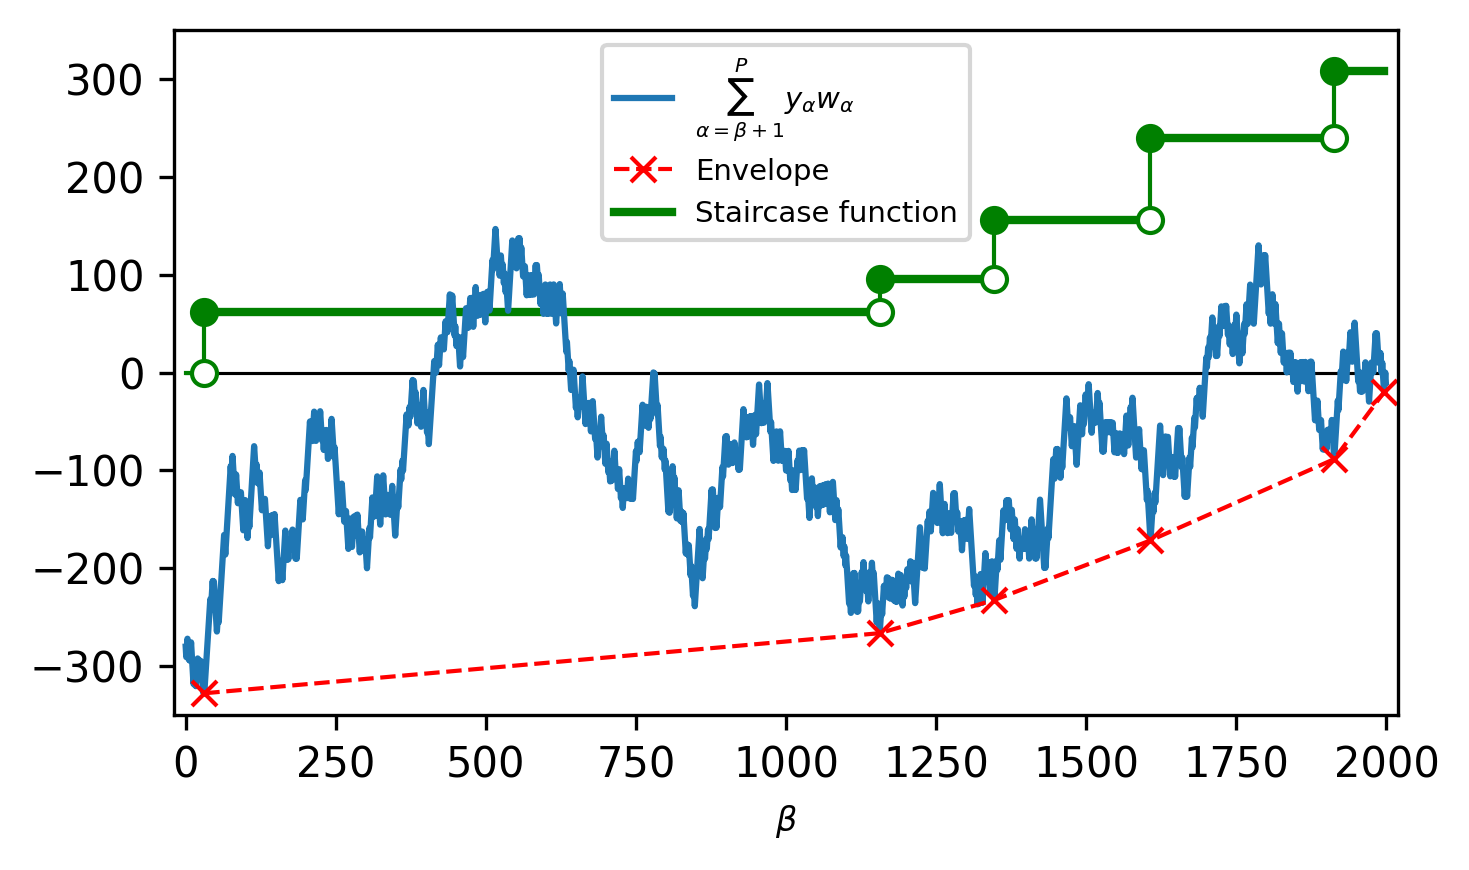

In [73]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(-y, label = r'$\sum_{\alpha = \beta+1}^P y_\alpha w_\alpha$')
plt.plot([0, P], [0, 0], 'k-', lw = .75, zorder = -1)
loc = find_touch_point(y)
plt.plot(loc, [-y[i]  for i in loc], 'rx--', lw = 1, label = 'Envelope')
steps = []
for i, loc_ in enumerate(loc[:-1]):
    steps.append(y[loc_] - y[loc[i+1]])
    plt.plot([loc_, loc[i+1]], [sum(steps), sum(steps)], 'g-', lw = 2, zorder = -1, label= 'Staircase function' if i == 0 else None)
    plt.scatter(loc_, sum(steps), marker = 'o', color = 'g')
    if i < len(loc)-2:
        plt.scatter(loc[i+1], sum(steps), facecolors='white', edgecolors='g')
    if i > 0:
        plt.plot([loc_, loc_], [sum(steps[:-1]), sum(steps)], 'g-', lw = 1, zorder = -1)
    if i == 0:
        plt.plot([loc_, loc_], [0, sum(steps)], 'g-', lw = 1, zorder = -1)
        plt.plot([0, loc_], [0, 0], 'g-', lw = 1, zorder = -1)
        plt.scatter(loc_, 0, facecolors='white', edgecolors='g')
plt.xlim(-20, P + 20)
plt.xlabel(r'$\beta$',fontsize = 8)
plt.ylim(-350, 350)
plt.legend(fontsize = 7)
plt.tight_layout()
plt.savefig('twostep.pdf', bbox_inches='tight')

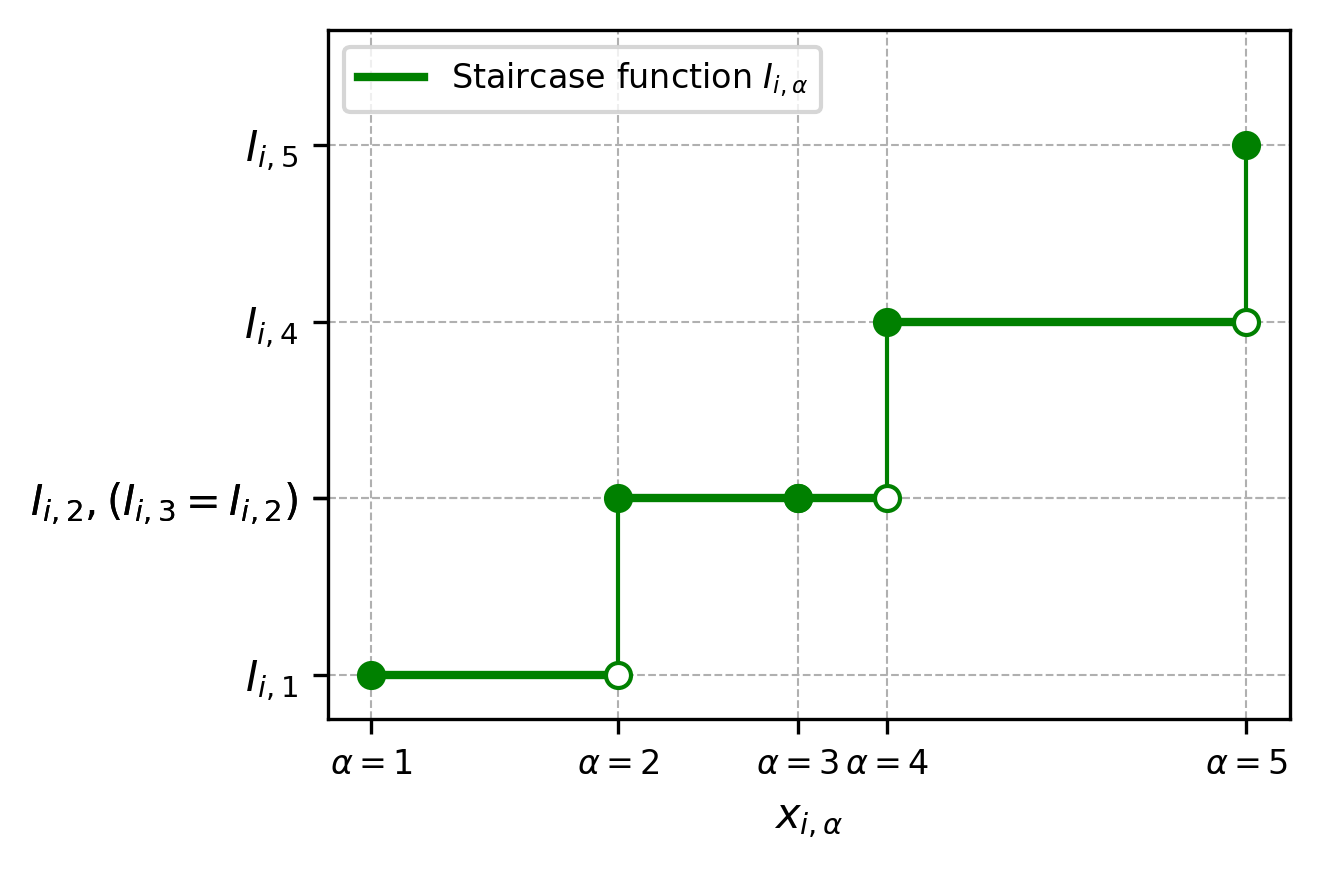

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Define a non-decreasing step function using numpy
x = [0, 1.1,  1.9, 2.3, 3.9] # Generate 1000 points between 0 and 10
y = np.floor(x) +.75 # Create steps by flooring the x values

plt.figure(figsize=(4.5, 3), dpi=300)
# plot the horizontal line at each step
for i, x_ in enumerate(x[:-1]):
    if i == 0:
        label = 'Staircase function '+r'$I_{i,\alpha}$'
    else:
        label = None
    plt.plot([x_, x[i+1]], [y[i], y[i]], 'g', lw=2, label = label)
    
# plot the vertical line at each step
for i, y_ in enumerate(y):
    if i == 0:
        continue
    plt.plot([x[i], x[i]], [y[i-1], y[i]], 'g', lw=1)
# filled dot at each step
plt.plot(x[1:], y[:-1], 'go', markerfacecolor='white', markeredgewidth=1)
plt.plot(x, y, 'o', color='g')

# plot vertical lines at the x values
# plt.vlines(x, 0, y, color='r',  linestyle='--', lw=.5)
plt.yticks(y, [r'$I_{i,1}$', 'a',r'$I_{i,2}, (I_{i,3}= I_{i,2}) $', r'$I_{i,4}$', r'$I_{i,5}$'], fontsize = 10)
plt.xticks(x, [r'$\alpha=1$', r'$\alpha=2$', r'$\alpha=3$', r'$\alpha=4$', r'$\alpha=5$'], fontsize = 8)
# plt.xticks(x)
plt.ylim(0.5,4.4)
plt.xlabel(r'$x_{i,\alpha}$')
# plt.ylabel('Y Axis', color='blue')  # Setting the y-axis label color to blue
plt.grid(True, which='both', linestyle='--', lw=.5)
plt.legend(loc = 'upper left', fontsize = 8)
plt.tight_layout()
plt.savefig('twostep_demo.pdf', bbox_inches='tight')
# Show the plot
plt.show()
